<a href="https://colab.research.google.com/github/ThienAnh2811/SotaySucKhoe/blob/main/guava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !unzip /content/drive/MyDrive/Colab\ Notebooks/guava.zip -d /content/drive/MyDrive/Colab\ Notebooks/

In [39]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [40]:
BATCH_SIZE = 16
IMAGE_SIZE_X = 224
IMAGE_SIZE_Y = 224
NUM_CLASSES = 3
CHANNELS=3
EPOCHS=50

In [41]:
dataset_dir = "/content/drive/MyDrive/Colab Notebooks/Gauva"

In [42]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE_X,IMAGE_SIZE_Y),
    batch_size=BATCH_SIZE
)


Found 185 files belonging to 3 classes.


In [43]:
class_names = dataset.class_names
class_names

['dot', 'healthy', 'rust']

In [44]:
import os

for class_name in class_names:
  class_dir = os.path.join(dataset_dir, class_name)
  num_images = len(os.listdir(class_dir))
  print(f"Class: {class_name}, Number of images: {num_images}")

Class: dot, Number of images: 61
Class: healthy, Number of images: 63
Class: rust, Number of images: 61


In [ ]:
# for image_batch, labels_batch in dataset.take(1):
#     print(image_batch.shape)
#     print(labels_batch.numpy())

In [ ]:
# plt.figure(figsize=(10, 10))
# for image_batch, labels_batch in dataset.take(1):
#     for i in range(12):
#         ax = plt.subplot(3, 4, i + 1)
#         plt.imshow(image_batch[i].numpy().astype("uint8"))
#         plt.title(class_names[labels_batch[i]])
#         plt.axis("off")

In [45]:
len(dataset)

12

In [46]:
train_size = 0.8
len(dataset)*train_size

9.600000000000001

In [47]:
train_ds = dataset.take(85)
len(train_ds)

12

In [48]:
test_ds = dataset.skip(85)
len(test_ds)

0

In [49]:
val_size=0.1
len(dataset)*val_size

1.2000000000000002

In [50]:
val_ds = test_ds.take(11)
len(val_ds)

0

In [51]:
test_ds = test_ds.skip(11)
len(test_ds)

0

In [52]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [53]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [54]:
len(train_ds)

9

In [55]:
len(val_ds)

1

In [56]:
len(test_ds)

2

In [57]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [58]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE_X, IMAGE_SIZE_Y),
  layers.Rescaling(1./255),
])

In [59]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer

class RandomBlur(Layer):
    def __init__(self, kernel_size=3, **kwargs):
        super(RandomBlur, self).__init__(**kwargs)
        self.kernel_size = kernel_size

    def call(self, images):
        channels = tf.shape(images)[-1]
        blur_kernel = tf.ones((self.kernel_size, self.kernel_size, channels, 1)) / (self.kernel_size ** 2)

        return tf.nn.depthwise_conv2d(
            images, blur_kernel,
            strides=[1, 1, 1, 1], padding='SAME'
        )

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness((0.1)),
    layers.RandomContrast(0.1),
    RandomBlur(5),
    layers.GaussianNoise(0.1)
])


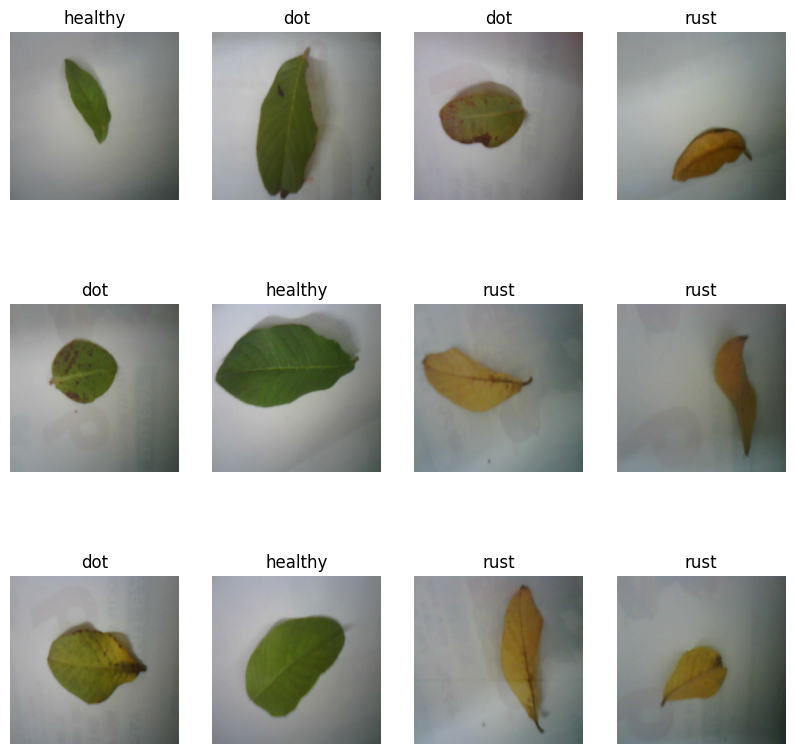

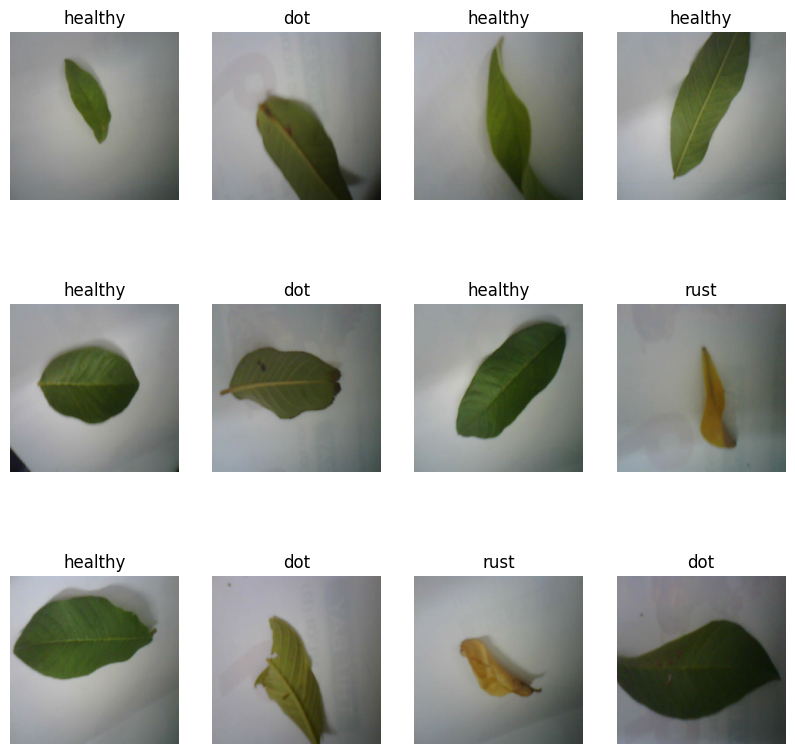

In [60]:
import matplotlib.pyplot as plt

for image_batch, labels_batch in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")
  plt.show()
  break


for image_batch, labels_batch in dataset.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")
  plt.show()
  break

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE_X, IMAGE_SIZE_Y, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))


model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │              

 Total params: 1,742,500 (6.65 MB)

 Trainable params: 1,741,892 (6.64 MB)

 Non-trainable params: 608 (2.38 KB)

In [ ]:
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy']
# )

In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# class_weights = {
#     0: 1.0,  # dot
#     1: 1.0,  # healthy
#     2: 1.0,  # mummification
#     3: 1.0   # rust
# }

earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# checkpoint = ModelCheckpoint(
#     '/content/guava-w-aug-esp32.h5',
#     monitor='val_loss',
#     save_best_only=True,
#     mode='min',
#     verbose=1
# )

# callbacks = [checkpoint, earlystop]
callbacks = [earlystop]

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=47,
    # class_weight=class_weights,
    callbacks=callbacks
)
#Note : 47 epochs

Epoch 1/47
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4019 - loss: 2.5158 - val_accuracy: 0.4375 - val_loss: 1.7506
Epoch 2/47
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5840 - loss: 1.5533 - val_accuracy: 0.3750 - val_loss: 1.5819
Epoch 3/47
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7035 - loss: 0.6851 - val_accuracy: 0.3750 - val_loss: 1.3656
Epoch 4/47
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7263 - loss: 0.8682 - val_accuracy: 0.3750 - val_loss: 1.1361
Epoch 5/47
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9035 - loss: 0.2683 - val_accuracy: 0.3750 - val_loss: 1.0352
Epoch 6/47
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8515 - loss: 0.3205 - val_accuracy: 0.5000 - val_loss: 0.9403
Epoch 7/47
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8837 - loss: 0.3164 - val_accuracy: 0.5000 - val_loss: 0.8962
Epoch 8/47
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8821 - loss: 0.2219 - val_accuracy: 0.6875 - val_loss: 0.8158
E

In [ ]:
# scores = model.evaluate(test_ds)

In [ ]:
# scores

In [73]:
history

In [74]:
history.params

{'verbose': 1, 'epochs': 47, 'steps': 9}

In [75]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [76]:
type(history.history['loss'])

list

In [77]:
len(history.history['loss'])

47

In [78]:
history.history['loss'][:5]

[2.2800710201263428,
 1.267243504524231,
 0.7414783835411072,
 0.8147912621498108,
 0.44611912965774536]

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

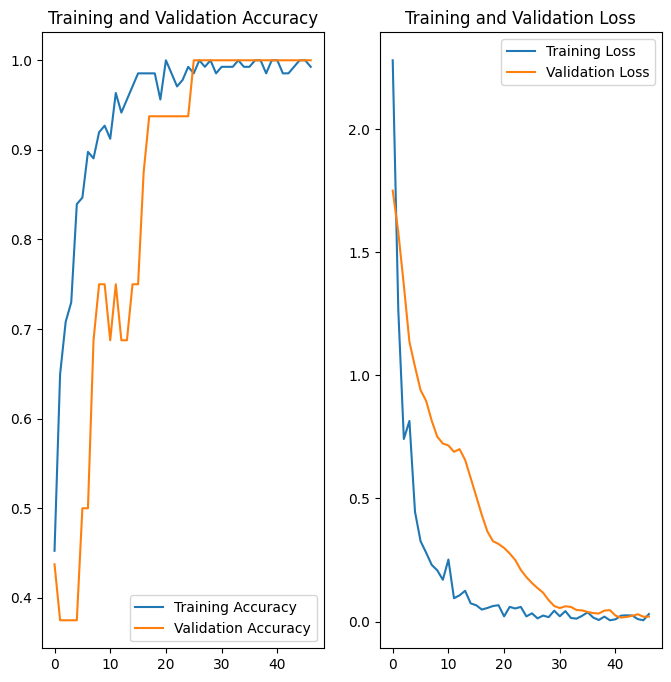

In [80]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [81]:
model.save('guava_model.keras')

first image to predict
actual label: healthy


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
predicted label: healthy


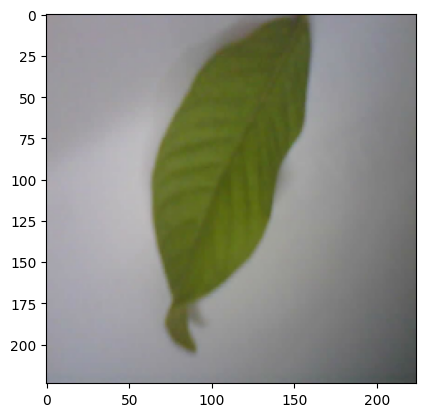

In [82]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [83]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


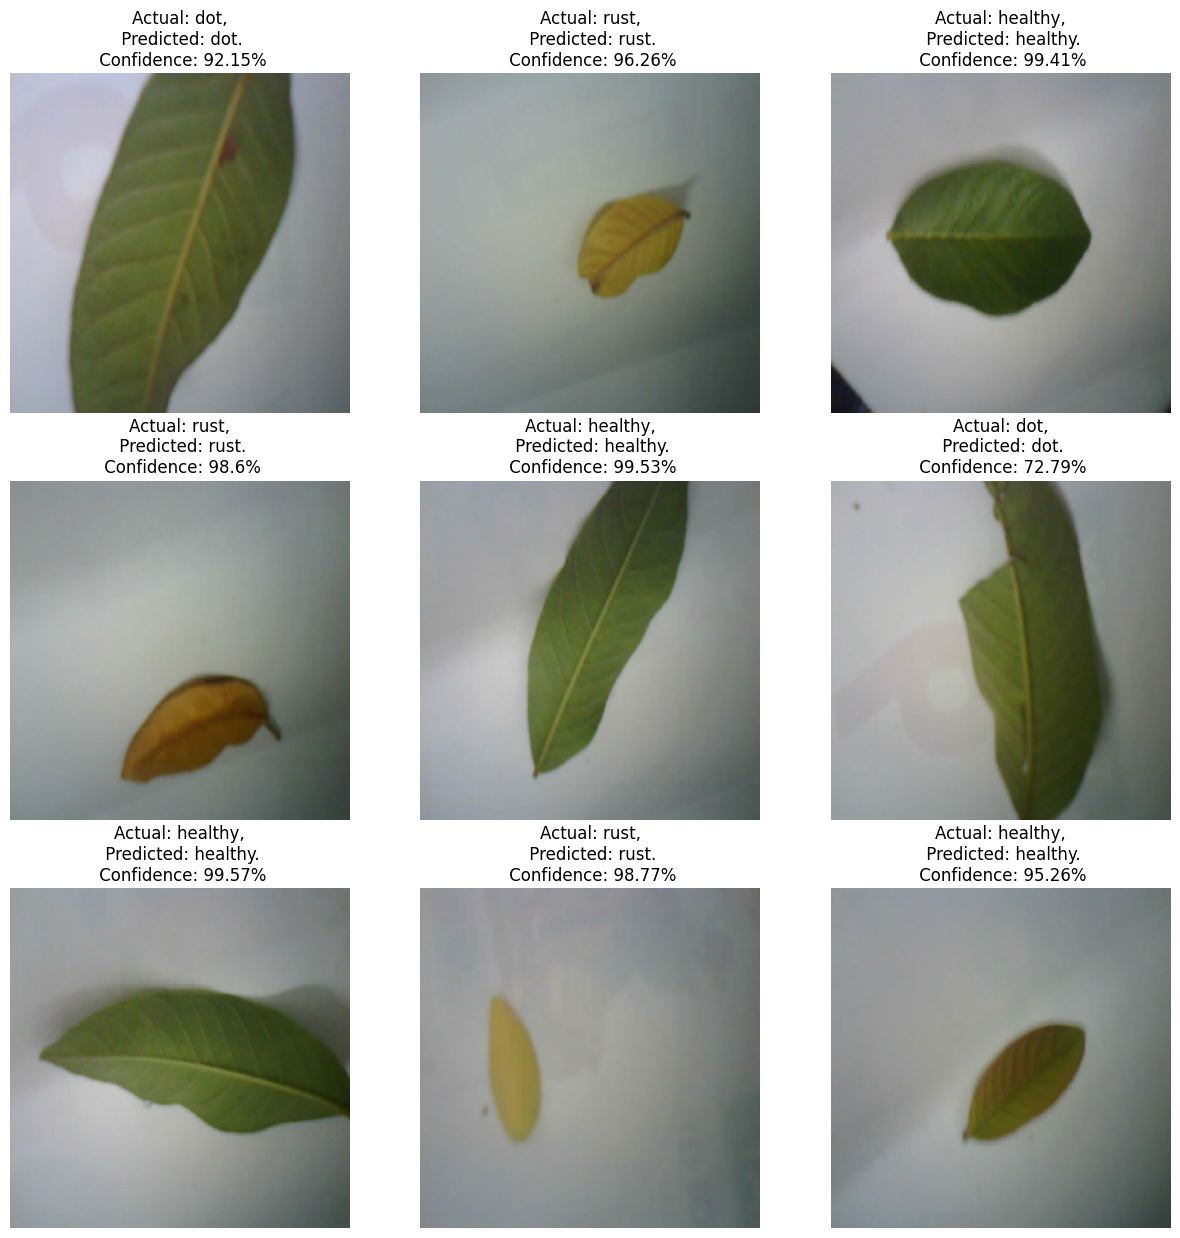

In [84]:
from tensorflow import keras

model = keras.models.load_model('/content/my_model.keras')
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Saving 20241111162349.jpg to 20241111162349 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
Image: 20241111162349 (2).jpg
Predicted class: healthy
Confidence: 92.23%


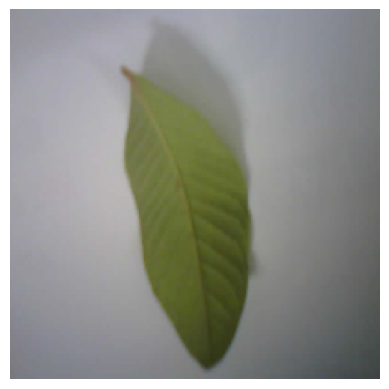

In [85]:

from google.colab import files
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('/content/guava_model.keras')

class_names = ['dot', 'healthy', 'rust']

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = tf.keras.utils.load_img(path, target_size=(224, 224))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)

  print(f"Image: {fn}")
  print(f"Predicted class: {predicted_class}")
  print(f"Confidence: {confidence}%")
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [86]:
model.save('my_model.keras')

In [87]:
import os

# Lọc ra các tệp có phần mở rộng .h5 và chỉ lấy phần tên tệp (không có phần mở rộng)
model_files = [f.split('.')[0] for f in os.listdir("/content/model") if f.endswith(".h5")]

# Chuyển đổi các tên tệp thành số nguyên, bỏ qua các tệp không phải số nguyên
model_versions = [int(f) for f in model_files if f.isdigit()]

# Tìm số phiên bản lớn nhất và cộng thêm 1
model_version = max(model_versions, default=0) + 1

# Lưu mô hình với tên phiên bản mới
model.save(f"/content/model/{model_version}.h5")
print(f"Model saved as /content/model/{model_version}.h5")


Model saved as /content/model/19.h5


Use trained model


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


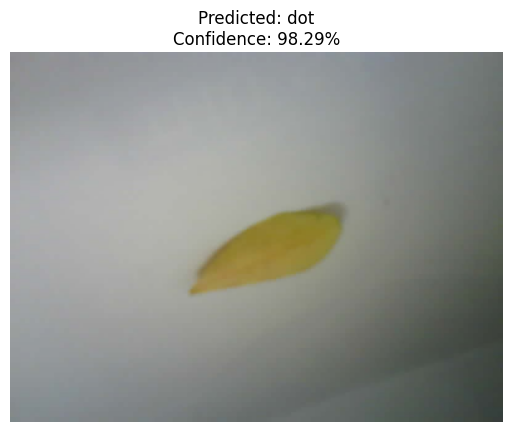

In [91]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Đường dẫn đến mô hình đã lưu
model_path = "/content/model/19.h5"
model = tf.keras.models.load_model(model_path)

# Các lớp của mô hình
class_names = ['dot', 'healthy', 'rust']

# Hàm xử lý ảnh
def preprocess_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.0
    return img_array

# Hàm dự đoán
def predict_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found at {image_path}")

    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)

    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100 * np.max(prediction[0]), 2)
    return predicted_class, confidence

# Đường dẫn ảnh cần dự đoán
image_path = "/content/drive/MyDrive/Colab Notebooks/Gauva/rust/20241111164713.jpg"  # Đảm bảo tệp tồn tại

# Dự đoán và hiển thị ảnh
try:
    predicted_class, confidence = predict_image(image_path)
    img = tf.keras.utils.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis("off")
    plt.show()
except FileNotFoundError as e:
    print(e)
